#### 三维空间斜面

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm


def plot_surf(xx, yy, zz, caption):
    # 归一化数据，用于创建颜色映射
    norm_plt = plt.Normalize(zz.min(), zz.max())
    colors = cm.RdYlBu_r(norm_plt(zz))

    # 创建一个三维坐标轴对象
    fig, ax = plt.subplots(subplot_kw={'projection': '3d'})
    # 创建三维曲面图
    surf = ax.plot_surface(xx, yy, zz, facecolors=colors, shade=False)
    surf.set_facecolor((0, 0, 0, 0))

    plt.show()
    # 设置正交投影类型
    ax.set_proj_type('ortho')

    if xx.min() == xx.max():
        ax.set_xlim(xx.min() - 4, xx.min() + 4)
    else:
        ax.set_xlim(xx.min(), xx.max())

    if yy.min() == yy.max():
        ax.set_ylim(yy.min() - 4, yy.min() + 4)
    else:
        ax.set_ylim(yy.min(), yy.max())

    if zz.min() == zz.max():
        ax.set_zlim(zz.min() - 4, zz.min() + 4)
    else:
        ax.set_zlim(zz.min(), zz.max())

    plt.tight_layout()
    ax.set_xlabel('$\it{x}$')
    ax.set_ylabel('$\it{y}$')
    ax.set_zlabel('$\it{z}$')
    ax.set_title(caption)
    ax.view_init(azim=-135, elev=30)
    # 更新三维坐标轴的网格线样式
    ax.xaxis._axinfo["grid"].update({"linewidth": 0.25, "linestyle": ":"})
    ax.yaxis._axinfo["grid"].update({"linewidth": 0.25, "linestyle": ":"})
    ax.zaxis._axinfo["grid"].update({"linewidth": 0.25, "linestyle": ":"})


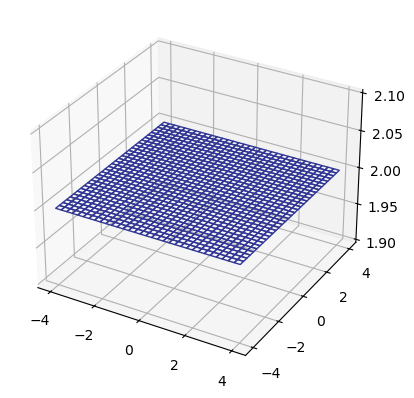

<Figure size 640x480 with 0 Axes>

In [2]:
num = 33
x = np.linspace(-4, 4, num)
y = np.linspace(-4, 4, num)
xx, yy = np.meshgrid(x, y);

plt.close('all')

zz = 2 + xx * 0;
caption = '$z - 2 = 0$';
plot_surf(xx, yy, zz, caption)



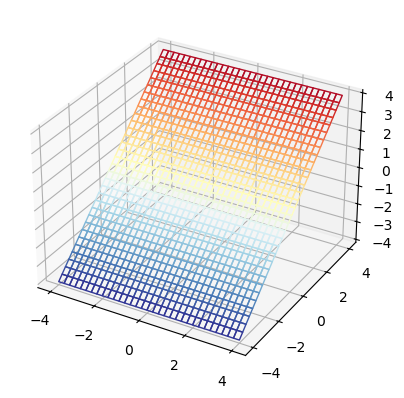

<Figure size 640x480 with 0 Axes>

In [3]:
zz = yy;
caption = '$z - y = 0$';
plot_surf(xx, yy, zz, caption)


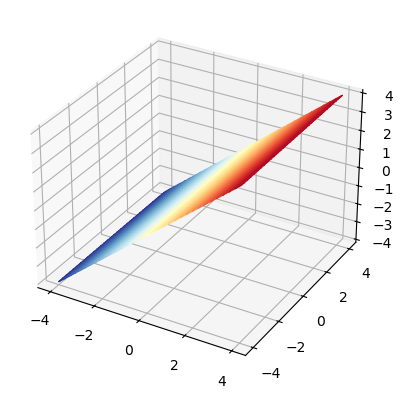

<Figure size 640x480 with 0 Axes>

In [4]:
zz = xx;
caption = '$x - z = 0$';
plot_surf(xx, yy, zz, caption)


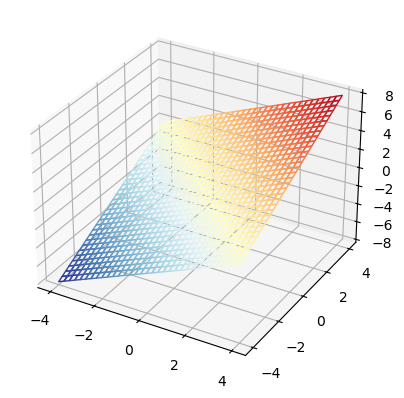

<Figure size 640x480 with 0 Axes>

In [5]:
zz = xx + yy;
caption = '$x + y - z = 0$';
plot_surf(xx, yy, zz, caption)


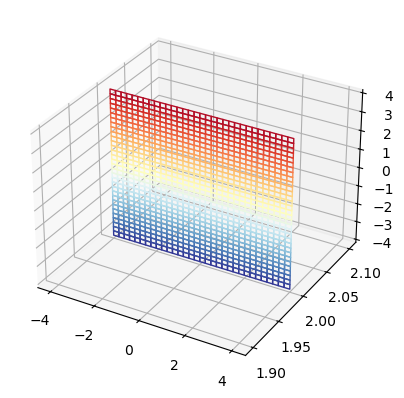

<Figure size 640x480 with 0 Axes>

In [6]:
x = np.linspace(-4, 4, num)
z = np.linspace(-4, 4, num)
xx, zz = np.meshgrid(x, z);

yy = 2 - xx * 0
caption = '$y - 2 = 0$';
plot_surf(xx, yy, zz, caption)


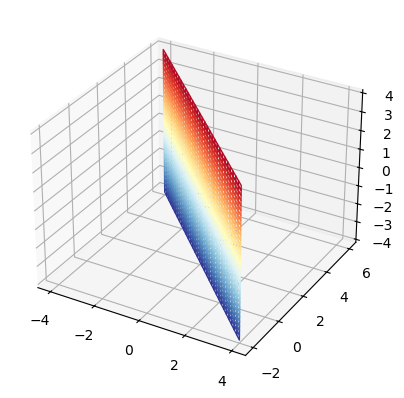

<Figure size 640x480 with 0 Axes>

In [7]:
yy = 2 - xx
caption = '$x + y - 2 = 0$';
plot_surf(xx, yy, zz, caption)


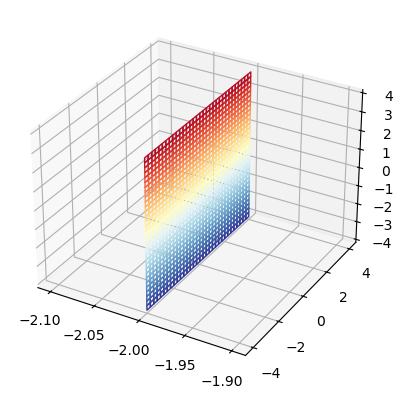

<Figure size 640x480 with 0 Axes>

In [8]:
y = np.linspace(-4, 4, num)
z = np.linspace(-4, 4, num)
yy, zz = np.meshgrid(y, z);

xx = -2 - yy * 0
caption = '$x + 2 = 0$';
plot_surf(xx, yy, zz, caption)

C:\Users\ghdong\AppData\Local\Temp\ipykernel_26876\19187429.py:25: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for i in range(0,len(CS.allsegs[0])):


AttributeError: 'NoneType' object has no attribute 'add_collection'

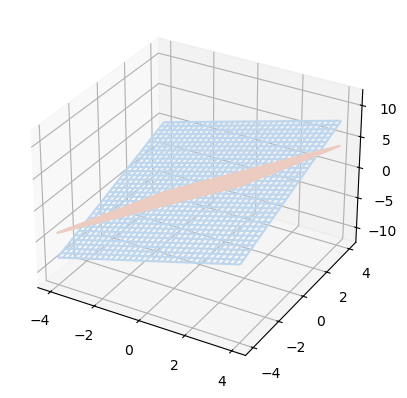

In [11]:
num = 33
x = np.linspace(-4,4,num)
y = np.linspace(-4,4,num)
xx,yy = np.meshgrid(x,y);

plt.close('all')

zz1 = xx + yy;
zz2 = 2*xx - yy;

fig, ax = plt.subplots(subplot_kw={'projection': '3d'})

# 绘制等高线
CS = ax.contour(xx,yy, zz1 - zz2, levels = [0], colors = '#339933')
# 清除图轴
ax.cla()  

# 绘制线框图
ax.plot_wireframe(xx, yy, zz1, color = '#BDD6EE') 
# , rstride=10, cstride=10
ax.plot_wireframe(xx, yy, zz2, color = '#ECCCC0') 

# plot the intersection line

for i in range(0,len(CS.allsegs[0])):

    contour_points_x_y = CS.allsegs[0][i]
    
    contour_points_z = (contour_points_x_y[:,0] + contour_points_x_y[:,1])

    ax.plot3D(contour_points_x_y[:,0],
              contour_points_x_y[:,1], 
              contour_points_z,
              color = 'k',
              linewidth = 4)

ax.set_proj_type('ortho')

ax.set_xlim(xx.min(),xx.max())
ax.set_ylim(yy.min(),yy.max())

plt.tight_layout()
ax.set_xlabel('$\it{x}$')
ax.set_ylabel('$\it{y}$')
ax.set_zlabel('$\it{z}$')

ax.view_init(azim=-135, elev=30)
ax.grid(False)

#### 不等式

In [12]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# define three visualization tools
# ========================
# 3D contour plot of zz
# ========================

def plot_3D_f_xy(xx,yy,zz):
    
    # 创建画布
    fig = plt.figure(figsize = (4,4))
    # 创建一个三维坐标轴对象
    ax = fig.add_subplot(projection='3d')
    # 绘制线框图
    ax.plot_wireframe(xx,yy, zz,
                    color = [0.75,0.75,0.75],
                    cmap='RdYlBu_r',
                    rstride=20, cstride=20,
                    linewidth = 0.25)
    # 创建颜色映射
    l_max = max(np.max(zz),-np.min(zz))
    levels = np.linspace(-l_max,l_max,21)
    # 绘制平面等高线
    ax.contour(xx, yy, zz, levels = levels, cmap = 'RdYlBu_r')
    
    # plot decision boundary 绘制决策边界
    ax.contour(xx, yy, zz, levels = [0], colors=['k'], linewidths=2)
    # 设置投影类型
    ax.set_proj_type('ortho')
    
    ax.set_xlim(xx.min(),xx.max())
    ax.set_ylim(yy.min(),yy.max())
    
    plt.tight_layout()
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_zlabel('f($x_1$,$x_2$)')
    ax.view_init(azim=-120, elev=30)
    ax.grid(False)

# ========================
# Wireframe plot of mask
# ========================

def plot_3D_mask(xx,yy,mask):
    
    fig = plt.figure(figsize = (4,4))
    ax = fig.add_subplot(projection='3d')
    
    ax.plot_wireframe(xx,yy, mask,
                    cmap='RdYlBu_r',
                    rstride=20, cstride=20,
                    linewidth = 0.25)
    
    ax.set_proj_type('ortho')
    
    ax.set_xlim(xx.min(),xx.max())
    ax.set_ylim(yy.min(),yy.max())
    ax.set_zlim(0,1.2)
    
    plt.tight_layout()
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_zlabel('[0,1]')
    ax.set_zticks([0,1])
    ax.view_init(azim=-120, elev=30)
    ax.grid(False)

# ========================
# 2D contour plot
# ========================

def plot_2D_contour(xx,yy,zz,mask):
    
    # Create color maps
    rgb = [[255, 238, 255],  # red
           [219, 238, 244]]  # blue
    rgb = np.array(rgb)/255.
    
    cmap_light = ListedColormap(rgb)
    
    fig, ax = plt.subplots(figsize = (4,4))
    l_max = max(np.max(zz),-np.min(zz))
    levels = np.linspace(-l_max,l_max,21)
    # 绘制平面填充等高线
    plt.contourf(xx, yy, mask, cmap=cmap_light)
    # 绘制平面等高线
    plt.contour(xx, yy, zz, levels = levels, cmap = 'RdYlBu_r')
    
    # plot decision boundary 绘制决策边界
    plt.contour(xx, yy, zz, levels = [0], colors=['k'])
    
    # Figure decorations
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    
    ax.grid(linestyle='--', linewidth=0.25, color=[0.5,0.5,0.5])
    # plt.axis('equal')
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')


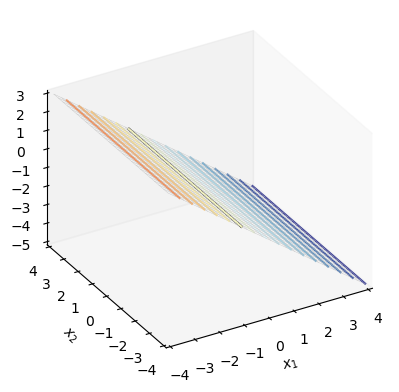

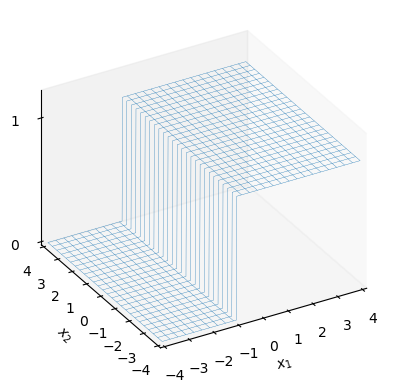

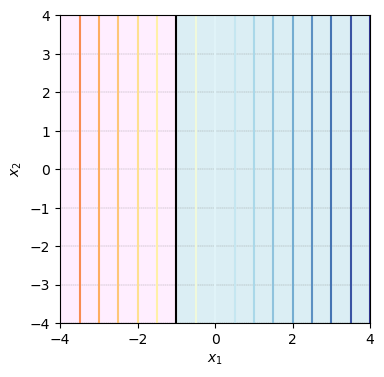

In [13]:
num = 500
x = np.linspace(-4, 4, num)
y = np.linspace(-4, 4, num)
xx, yy = np.meshgrid(x, y);

# plt.close('all')

zz = -xx - 1
# 创建二进制掩码
# satisfy the inequality: 1
# otherwise: 0
mask_less_than_0 = (zz < 0) + 0

plot_3D_f_xy(xx, yy, zz)
plot_3D_mask(xx, yy, mask_less_than_0)
plot_2D_contour(xx, yy, zz, mask_less_than_0)


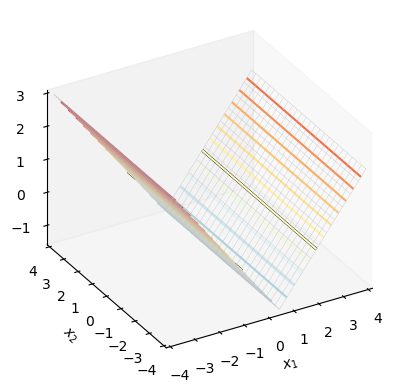

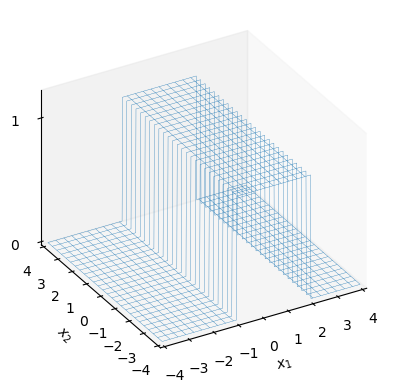

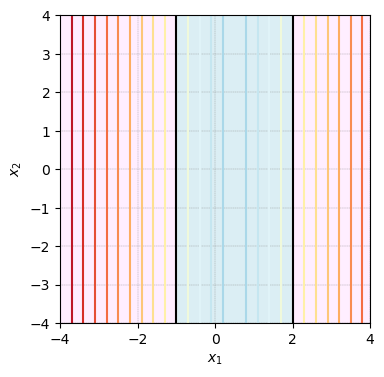

In [77]:
zz = np.abs(xx - 0.5) - 1.5
mask_less_than_0 = (zz < 0) + 0

plot_3D_f_xy(xx, yy, zz)
plot_3D_mask(xx, yy, mask_less_than_0)
plot_2D_contour(xx, yy, zz, mask_less_than_0)

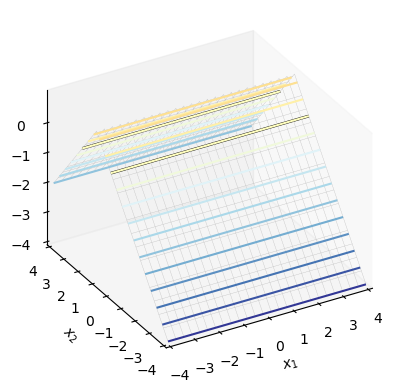

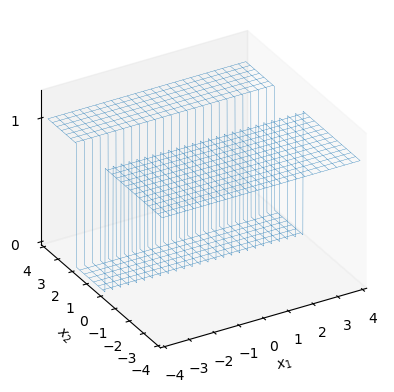

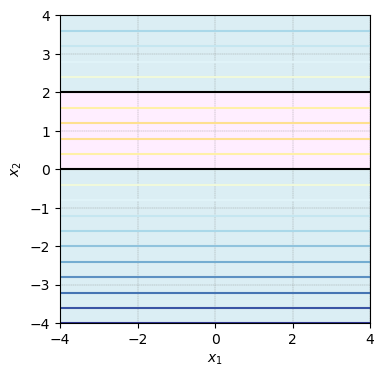

In [78]:
zz = -np.abs(yy - 1) + 1
mask_less_than_0 = (zz < 0) + 0

plot_3D_f_xy(xx, yy, zz)
plot_3D_mask(xx, yy, mask_less_than_0)
plot_2D_contour(xx, yy, zz, mask_less_than_0)


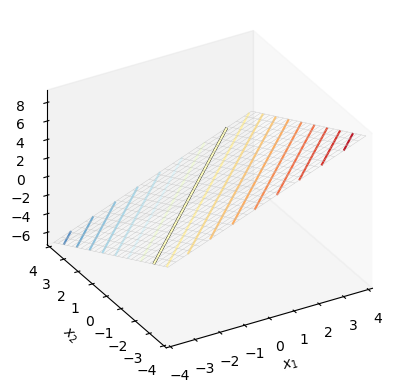

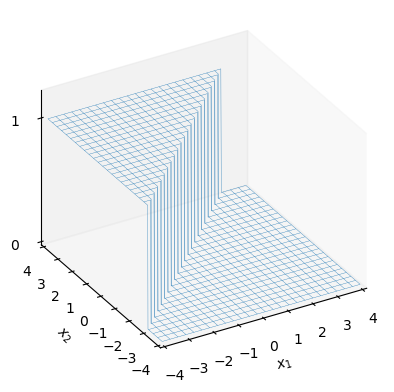

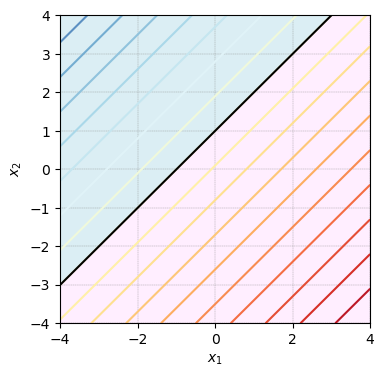

In [79]:
zz = xx - yy + 1
mask_less_than_0 = (zz < 0) + 0

plot_3D_f_xy(xx, yy, zz)
plot_3D_mask(xx, yy, mask_less_than_0)
plot_2D_contour(xx, yy, zz, mask_less_than_0)


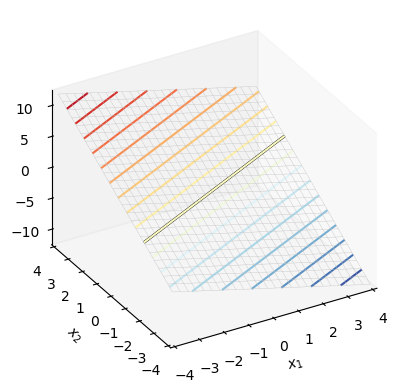

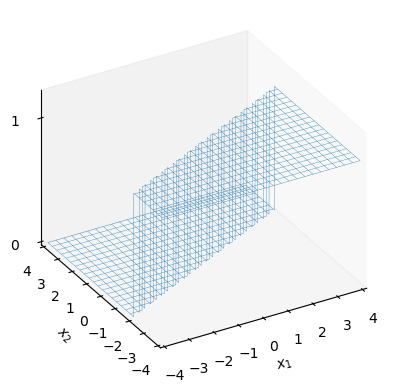

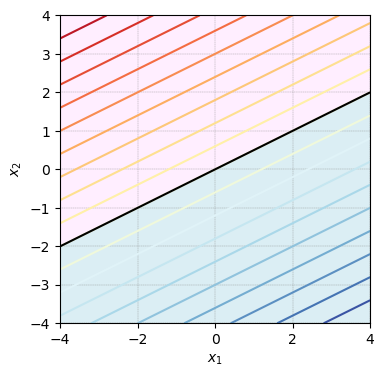

In [80]:
zz = - xx + 2 * yy
mask_less_than_0 = (zz < 0) + 0

plot_3D_f_xy(xx, yy, zz)
plot_3D_mask(xx, yy, mask_less_than_0)
plot_2D_contour(xx, yy, zz, mask_less_than_0)


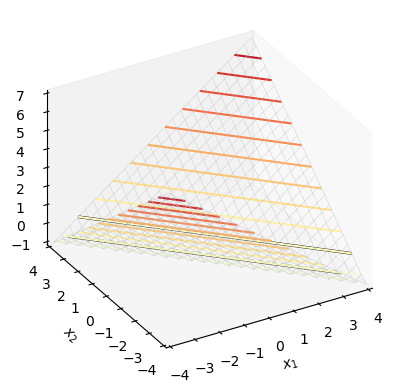

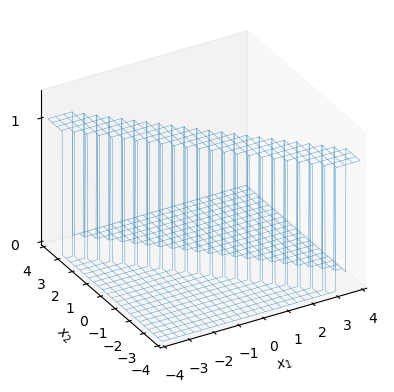

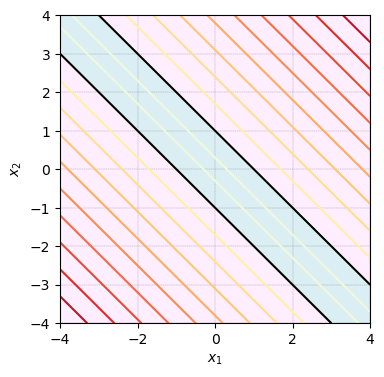

In [81]:
zz = np.abs(xx + yy) - 1
mask_less_than_0 = (zz < 0) + 0

plot_3D_f_xy(xx, yy, zz)
plot_3D_mask(xx, yy, mask_less_than_0)
plot_2D_contour(xx, yy, zz, mask_less_than_0)


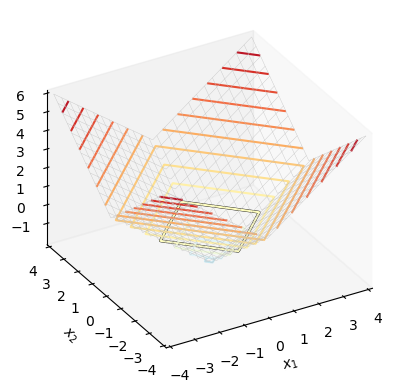

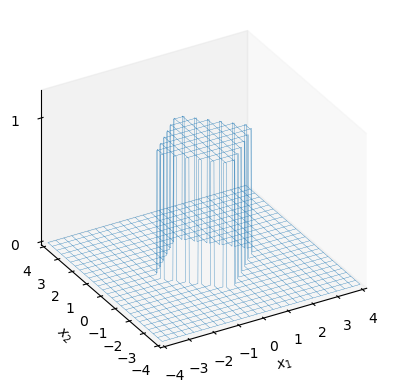

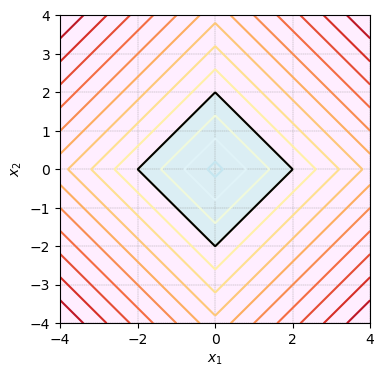

In [82]:
zz = np.abs(xx) + np.abs(yy) - 2
mask_less_than_0 = (zz < 0) + 0

plot_3D_f_xy(xx, yy, zz)
plot_3D_mask(xx, yy, mask_less_than_0)
plot_2D_contour(xx, yy, zz, mask_less_than_0)


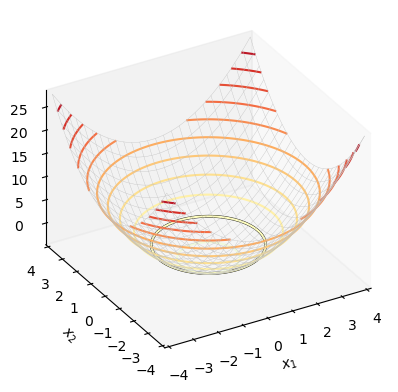

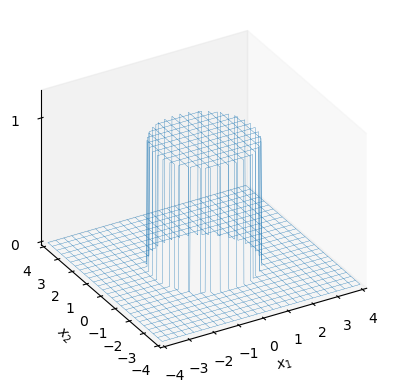

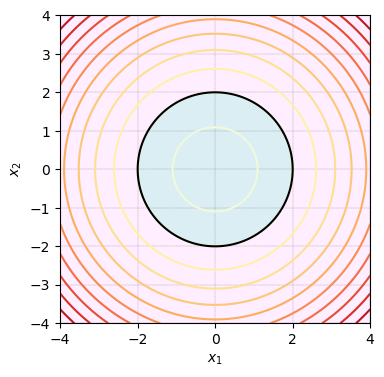

In [83]:
zz = xx ** 2 + yy ** 2 - 4
mask_less_than_0 = (zz < 0) + 0

plot_3D_f_xy(xx, yy, zz)
plot_3D_mask(xx, yy, mask_less_than_0)
plot_2D_contour(xx, yy, zz, mask_less_than_0)

#### 三维极坐标

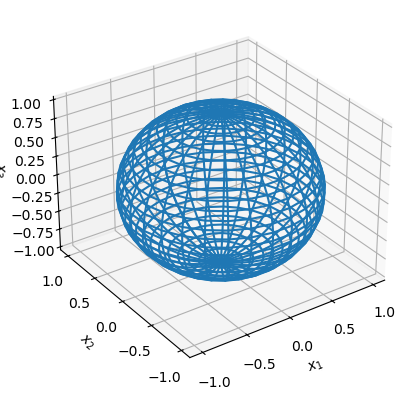

In [84]:
u = np.linspace(0, np.pi, 30)
v = np.linspace(0, 2 * np.pi, 30)

x = np.outer(np.sin(u), np.sin(v))
y = np.outer(np.sin(u), np.cos(v))
z = np.outer(np.cos(u), np.ones_like(v))

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
# ax.set_aspect('equal')

ax.plot_wireframe(x, y, z)
ax.set_xlabel('$\it{x_1}$')
ax.set_ylabel('$\it{x_2}$')
ax.set_zlabel('$\it{x_3}$')
ax.view_init(azim=-125, elev=30)

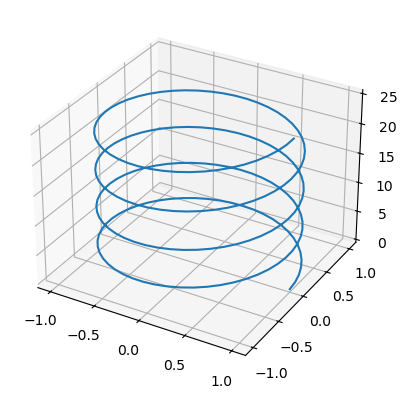

<Figure size 640x480 with 0 Axes>

In [85]:
t = np.linspace(0,8*np.pi, 200)

# parametric equation of spiral
x1 = np.cos(t)
x2 = np.sin(t)
x3 = t

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot(x1, x2, x3)

plt.show()
ax.set_proj_type('ortho')

ax.set_xlim(-1.5,1.5)
ax.set_ylim(-1.5,1.5)
ax.set_zlim(0,t.max())

plt.tight_layout()
ax.set_xlabel('$\it{x_1}$')
ax.set_ylabel('$\it{x_2}$')
ax.set_zlabel('$\it{x_3}$')

ax.view_init(azim=-135, elev=30)
ax.xaxis._axinfo["grid"].update({"linewidth":0.25, "linestyle" : ":"})
ax.yaxis._axinfo["grid"].update({"linewidth":0.25, "linestyle" : ":"})
ax.zaxis._axinfo["grid"].update({"linewidth":0.25, "linestyle" : ":"})

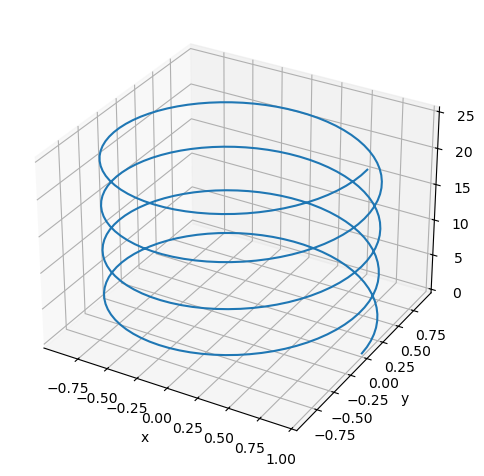

In [86]:
from sympy import *
from sympy.plotting import plot3d_parametric_line
import math

t = symbols('t')

# parametric equation of spiral
x1 = cos(t)
x2 = sin(t)
x3 = t

plot3d_parametric_line(x1, x2, x3, (t, 0, 8*math.pi))